In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import random
%pip install mpl_point_clicker
from mpl_point_clicker import clicker

Note: you may need to restart the kernel to use updated packages.


Napisać kod pokazujący wizualnie postęp uczenia typu GD (Gradient Descent) na przykładzie regresji liniowej
w przestrzeni jednowymiarowej (funkcja straty: MSE).

c. Dane
- zadawać tablicą w kodzie [[x1, y1], [x2, y2], ..., [xn, yn]]

In [2]:
# make_regression wyręczyło mnie z wymyślania par x,y :)
X, y = make_regression(n_samples=10, n_features=1, n_targets=1)
data_array = np.array([[X_el[0], y_el] for X_el, y_el in zip(X, y)])
data_array

array([[   0.67591301,   62.56955052],
       [   1.2114065 ,  112.14040657],
       [   0.61644324,   57.06440905],
       [  -0.82785672,  -76.63504324],
       [  -0.78565701,  -72.72859841],
       [  -1.75327785, -162.30166418],
       [  -1.59840037, -147.96459127],
       [  -0.61816649,  -57.2239302 ],
       [  -0.606057  ,  -56.10294973],
       [   0.20886499,   19.33471963]])

- wprowadzać klikając na wykresie (ustawić przedział [-5, 5])

W tym celu użyto biblioteki mpl_point_clicker, która służy pierwotnie do wieloklasowego labelowania zdjęć. Natomiast można jej też użyć do przechwytywania koordynatów klikniętych miejsc na wykresie. Do tego trzeba użyć linijki "%matplotlib notebook". W celu zaczęcia wprowadzania punktów należy uruchomić komórkę, a następnie wybierać miejsca na wykresie. W międzyczasie można uruchomić jedną komórkę niżej aby zobaczyć współrzędne obecnie zaznaczonych miejsc. Aby zakończyć wprowadzanie, należy kliknąć niebieski przycisk w prawym, górnym rogu wykresu.

<IPython.core.display.Javascript object>


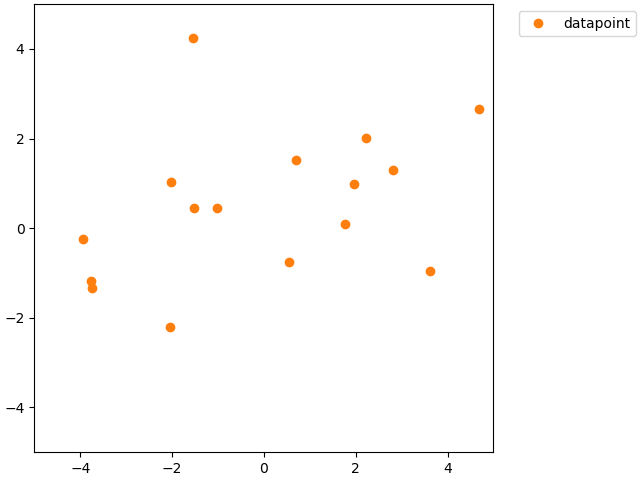

In [3]:
# Uruchom wprowadzanie z poziomu wykresu

%matplotlib notebook

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(0, 0)
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
klicker = clicker(ax, ["datapoint"], markers=["o"])

plt.show()

In [4]:
print(klicker.get_positions())

{'datapoint': array([[-2.0245005 ,  1.0348986 ],
       [-1.52342622,  0.45446862],
       [ 0.69872928,  1.52603166],
       [ 1.96230789,  0.99025014],
       [ 0.54622841, -0.75103981],
       [-3.76736756, -1.17520019],
       [-3.94165427, -0.23758252],
       [ 2.22373795,  2.01716473],
       [-1.54521206,  4.24958775],
       [ 1.76623535,  0.09728093],
       [-2.04628634, -2.20211477],
       [-1.02235194,  0.45446862],
       [ 2.81195558,  1.30278936],
       [ 4.68553767,  2.6645674 ],
       [ 3.6180316 , -0.95195788],
       [-3.74558172, -1.3314698 ]])}


In [5]:
# Zapisz wprowadzone punkty w tablicy

data_array = klicker.get_positions()['datapoint']
data_array

array([[-2.0245005 ,  1.0348986 ],
       [-1.52342622,  0.45446862],
       [ 0.69872928,  1.52603166],
       [ 1.96230789,  0.99025014],
       [ 0.54622841, -0.75103981],
       [-3.76736756, -1.17520019],
       [-3.94165427, -0.23758252],
       [ 2.22373795,  2.01716473],
       [-1.54521206,  4.24958775],
       [ 1.76623535,  0.09728093],
       [-2.04628634, -2.20211477],
       [-1.02235194,  0.45446862],
       [ 2.81195558,  1.30278936],
       [ 4.68553767,  2.6645674 ],
       [ 3.6180316 , -0.95195788],
       [-3.74558172, -1.3314698 ]])

- generować n punktów w zadanym przedziale [xmin, xmax] (ustawić n=10, przedział [-5, 5]) według prostej y=ax+b zaburzonej losowo (ustawić a=0.5, b=-1)

In [6]:
xmin = -5
xmax = 5
n = 10
a = 0.5
b = -1

def y(a, x, b, noise):
    return a * x + b + noise

def generate_along_the_line(a, b, n, xmin, xmax):
    data_array = []
    xs = [random.uniform(xmin, xmax) for _ in range(n)]
    for x in xs:
        noise = random.random()
        data_array.append([x, y(a, x, b, noise)])
    return np.array(data_array)

data_array = generate_along_the_line(a, b, n, xmin, xmax)
data_array

array([[-0.56400753, -0.43225137],
       [-0.97491473, -1.11454164],
       [-1.43626081, -1.16769561],
       [-3.27752083, -2.39681451],
       [-4.32159667, -2.40218066],
       [-2.06160365, -1.72351949],
       [-2.16753691, -1.7890566 ],
       [-2.47620645, -1.79115558],
       [ 0.78131011, -0.30683723],
       [ 4.83895682,  1.82308154]])

a. Hiperparametry zadawane w kodzie
- liczba epok (ustawić na 10)

In [7]:
epochs = 10

- współczynnik uczenia (ustawić na 0.05)

In [8]:
learning_rate = 0.05

b. Wizualizacja co epokę na tym samym wykresie (%matplotlib inline)
- dane
- prosta
- bieżące wartości parametrów
- wartość funkcji straty

In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

x = np.array([data_array[i][0] for i in range(len(data_array))]).reshape(-1, 1)
y = np.array([data_array[i][1] for i in range(len(data_array))]).reshape(-1, 1)
theta_history = []
loss_function_history = []
y_pred_history = []
theta0 = [0]
theta1 = [0]
tolerance = 1e-3
previous_loss = None
for epoch in range(epochs):
    y_pred = theta0 * x + theta1
    y_pred_history.append(y_pred)
    curent_loss = mean_squared_error(y, y_pred)
    loss_function_history.append(curent_loss)
    theta_history.append([theta0, theta1])
    theta0_derivative = -2/len(x) * sum(x * (y - y_pred))
    theta1_derivative = -2/len(x) * sum(y - y_pred)
    theta0 = theta0 - learning_rate * theta0_derivative
    theta1 = theta1 - learning_rate * theta1_derivative
    if previous_loss and abs(previous_loss-curent_loss) < tolerance:
        print('Gradient Descent osiagnal zbieznosc')
        break
    previous_loss = curent_loss

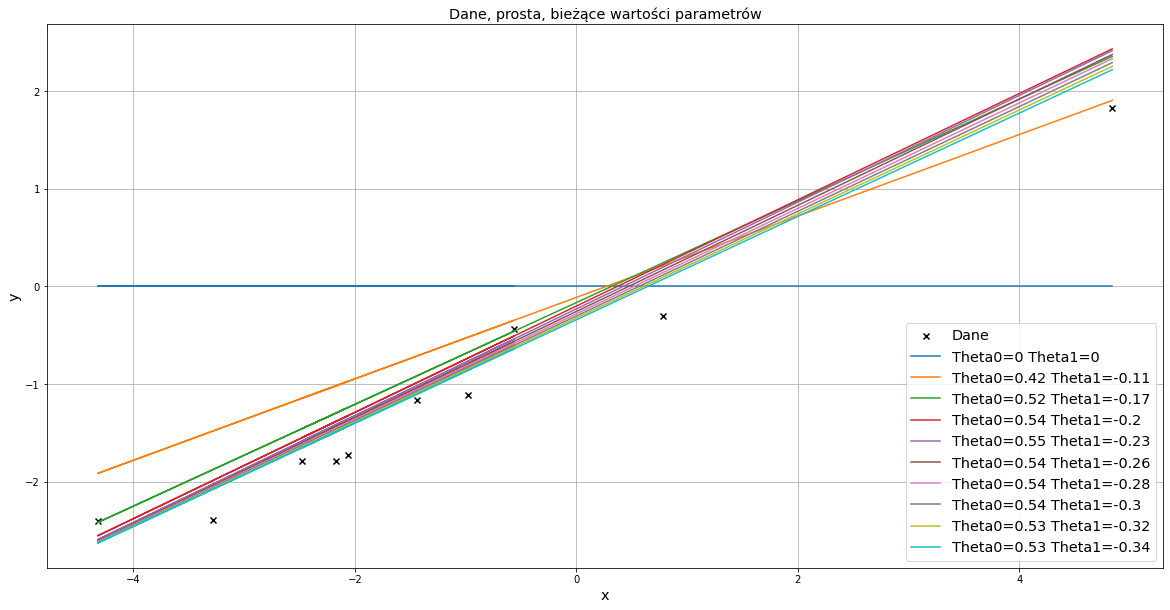

In [11]:
plt.scatter([data_array[i][0] for i in range(len(data_array))], [data_array[i][1] for i in range(len(data_array))], label='Dane', marker='x', color='black')
for pred, thetas in zip(y_pred_history, theta_history):
    plt.plot(x, pred, label=f'Theta0={round(thetas[0][0], 2)} Theta1={round(thetas[1][0], 2)}')
plt.title('Dane, prosta, bieżące wartości parametrów', fontsize='x-large')
plt.xlabel('x', fontsize='x-large')
plt.ylabel('y', fontsize='x-large')
plt.grid()
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

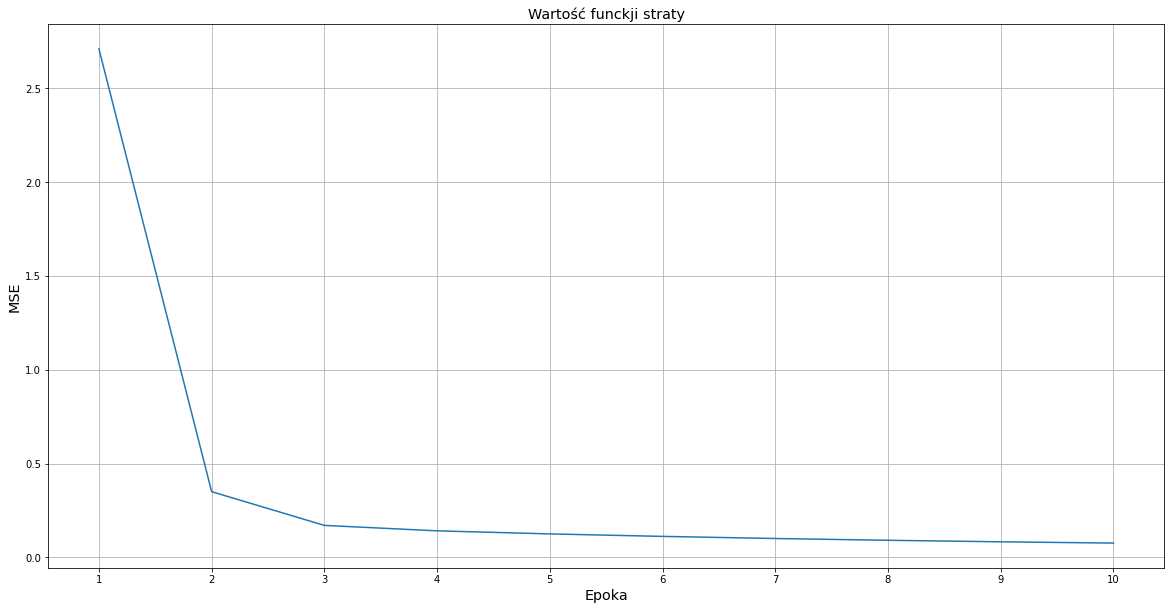

In [12]:
plt.plot(list(range(1, epochs + 1)), loss_function_history)
plt.title('Wartość funckji straty', fontsize='x-large')
plt.xticks(np.arange(1, epochs + 1, step=1))
plt.xlabel('Epoka', fontsize='x-large')
plt.ylabel('MSE', fontsize='x-large')
plt.grid()
plt.show()